# Linear Regression with One Variable

For original packed homework instructions, refer to the file `machine-learning-ex1.zip`.

## Problem Desciption

In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

You would like to use this data to help you select which city to expand to next. The file `ex1data1.txt` contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

## Preparation

In [2]:
# Import the libraries required

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define the function for reading & parsing data

def read_data_from(file, seperator=','):
    """Read arrays x, y repectively from the given file object."""
    x = []
    y = []
    for line in file:
        x_addition, y_addition = line.split(seperator)
        x.append(float(x_addition))
        y.append(float(y_addition))
    return np.array(x), np.array(y)

In [4]:
# Define the functions for plotting specified functions

def _plot_function(ax, x, f=None, **kwargs):
    """Plot the specified function f (a Callable) with the definition domain as x (an array-like) on the specified Axes (ax)."""
    if f is None:
        return ax.plot(x, **kwargs)
    else:
        return ax.plot(x, np.array([f(i) for i in x]), **kwargs)

def plot_function(ax, xmin, xmax, f=None, n=10000, **kwargs):
    """Plot the specified function f (a Callable) with the max & min values of x on the specified Axes (ax)."""
    if xmax < xmin:
        xmin, xmax = xmax, xmin
    return _plot_function(ax, np.linspace(xmin, xmax, n), f, **kwargs)

In [5]:
# Define the linear function

def _linear(*thetas):
    """Return a linear function with thetas given; not recognizing theta_0."""
    def func(*x):
        res = 0
        for i in range(len(x)):
            res += thetas[i] * x[i]
        return res
    return func

def linear(*thetas):
    """Return a linear function with thetas given; recognizing theta_0."""
    _func = _linear(*thetas)
    def func(*x):
        return _func(1, *x)
    return func

def linear_derivative(i, *thetas):
    """Return the partial derivative of the linear function with thetas given, with respect to i-th theta (Not used)."""
    def func(*x):
        return thetas[i]
    return func

In [6]:
# Define the cost function (Mean Squared Error)

def _mse(y1, y2):
    """Calculate the MSE between y1 and y2 (both array-like)."""
    cnt = min(len(y1), len(y2)) # Extra elements are ignored
    sm = 0.0
    for i in range(cnt):
        sm += (y1[i]-y2[i]) * (y1[i]-y2[i])
    return sm / cnt

def mse(x, f, y):
    """Calculate the MSE of given set x (array-like) with function f and another given set y (array-like)."""
    y1 = np.empty(len(x))
    for i in range(len(x)):
        y1[i] = f(x[i])
    return _mse(y1, y)

# So is it the so-called "batch gradient descent" - to change the value only after a batch of examples?
def mse_gradient(x, *thetas):
    """Calculate the gradient of MSE (as a tuple) with the given set of x (array-like) and thetas (Not used)."""
    f = linear(*thetas)
    f_derivative = linear_derivative(*thetas)
    y = np.empty(len(x))
    for i in range(len(x)):
        y[i] = f(x[i])
    pass # I cannot figure this out!

In [7]:
# Plot the costs (losses)

def plot_errors(*args, **kwargs):
    x = []
    y = []
    for record in e:
        x.append(record[0])
        y.append(record[1])
    fig, ax = plt.subplots()
    ax.plot(x, y, *args, **kwargs)
    ax.set(
        title='Errors',
        xlabel='Time',
        ylabel='Error (MSE)'
    )
    plt.show()

## Solution

### Data Loading & Visualization

In [8]:
# Read arrays x and y from the file

with open('ex1data1.txt') as file:
    x, y = read_data_from(file)

In [9]:
# Display the data being read

print('x =')
print(x)
print()
print('y =')
print(y)

x =
[ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
  5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
  6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
 10.957  13.176  22.203   5.2524  6.5894  9.2482  5.8918  8.2111  7.9334
  8.0959  5.6063 12.836   6.3534  5.4069  6.8825 11.708   5.7737  7.8247
  7.0931  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031
  6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
 14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   7.3345
  6.0062  7.2259  5.0269  6.5479  7.5386  5.0365 10.274   5.1077  5.7292
  5.1884  6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594
  5.7077  7.6366  5.8707  5.3054  8.2934 13.394   5.4369]

y =
[17.592    9.1302  13.662   11.854    6.8233  11.886    4.3483  12.
  6.5987   3.8166   3.2522  15.505    3.1551   7.2258   0.71618  3.5129
  5.3048   0.56077  3.6518   5.3893   3.1386  21.767    4.263    

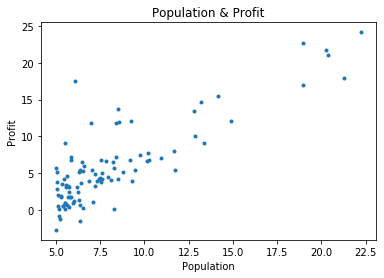

In [10]:
# Visualize the data with scatter plot

plt.plot(x, y, '.')
plt.title('Population & Profit')
plt.xlabel('Population')
plt.ylabel('Profit')

plt.show()

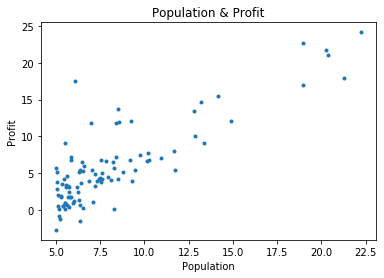

In [11]:
# Another visualization method (recommended)

fig, ax = plt.subplots()

ax.plot(x, y, '.')
ax.set(
    title='Population & Profit',
    xlabel='Population',
    ylabel='Profit'
)

plt.show()

In [12]:
# Define the function for one-call visualization of data and function

def visualize(f=None):
    fig, ax = plt.subplots()
    ax.plot(x, y, '.')
    ax.set(
        title='Population & Profit',
        xlabel='Population',
        ylabel='Profit'
    )
    if f is not None:
        plot_function(ax, np.min(x), np.max(x), f)
    plt.show()

### Gradient Descent

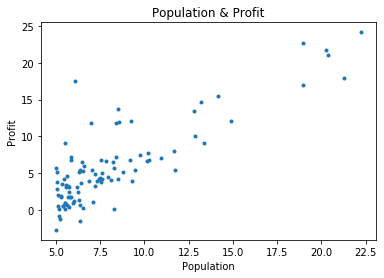

In [13]:
# Visualization of raw data

visualize()

In [14]:
# Some settings

alpha = 0.01           # learning rate

def init_parameters():
    return 0, 0

Epoch 0: b = 0, k = 0, error = 64.14546775491131
Epoch 100: b = -0.5765562303322348, k = 0.8595815252727688, error = 10.959951161070222
Epoch 200: b = -1.1245018112987775, k = 0.9146286023471152, error = 10.352305925783936
Epoch 300: b = -1.581991219049229, k = 0.9605883756602133, error = 9.92872409236949
Epoch 400: b = -1.9639571760237742, k = 0.9989609991537096, error = 9.633450536057955
Epoch 500: b = -2.2828672749589267, k = 1.0309989777517024, error = 9.42761906223373
Epoch 600: b = -2.549130928422701, k = 1.057748049855657, error = 9.284136536585713
Epoch 700: b = -2.7714391381426187, k = 1.0800813208588218, error = 9.184116676727372
Epoch 800: b = -2.957048174396602, k = 1.09872776181806, error = 9.11439409329151
Epoch 900: b = -3.1120164249283144, k = 1.114296003496455, error = 9.06579135931592
Epoch 1000: b = -3.241402144274422, k = 1.1272942024281842, error = 9.031911006157824
Epoch 1100: b = -3.349428558157724, k = 1.1381466274456649, error = 9.008293439074167
Epoch 1200: b 

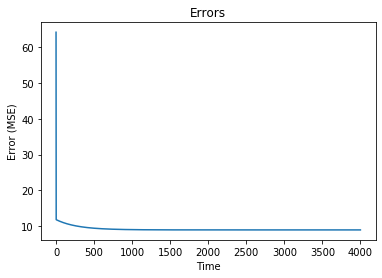

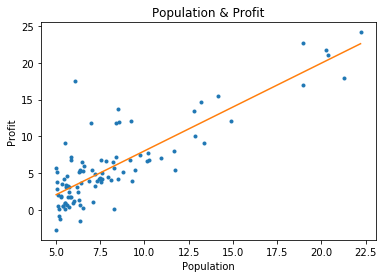

In [18]:
# Core part of gradient descent
# Performed manually; needs enhancement

b, k = init_parameters()

e = []                 # recorded errors

iteration_count = 4000 # number of iterations
interval = 100         # intervals between which to give a message
m = len(x)             # training set volume

current_error = mse(x, linear(b, k), y)
print('Epoch 0: b = {}, k = {}, error = {}'.format(b, k, current_error))
e.append((0, current_error))

for i in range(1, iteration_count+1):
    f = linear(b, k)
    b_offset, k_offset = 0, 0
    for j in range(m):
        term = f(x[j]) - y[j]
        b_offset += term
        k_offset += term * x[j]
    b_offset = b_offset * alpha / m
    k_offset = k_offset * alpha / m
    b -= b_offset
    k -= k_offset
    current_error = mse(x, linear(b, k), y)
    if i % interval == 0:
        print('Epoch {}: b = {}, k = {}, error = {}'.format(i, b, k, current_error))
    e.append((i, current_error))
    
plot_errors()
visualize(linear(b, k))

Epoch 0: b = 0, k = 0, error = 64.14546775491131
Epoch 100: b = -0.5765562303322348, k = 0.8595815252727688, error = 10.959951161070222
Epoch 200: b = -1.1245018112987775, k = 0.9146286023471152, error = 10.352305925783936
Epoch 300: b = -1.581991219049229, k = 0.9605883756602133, error = 9.92872409236949
Epoch 400: b = -1.9639571760237742, k = 0.9989609991537096, error = 9.633450536057955
Epoch 500: b = -2.2828672749589267, k = 1.0309989777517024, error = 9.42761906223373
Epoch 600: b = -2.549130928422701, k = 1.057748049855657, error = 9.284136536585713
Epoch 700: b = -2.7714391381426187, k = 1.0800813208588218, error = 9.184116676727372
Epoch 800: b = -2.957048174396602, k = 1.09872776181806, error = 9.11439409329151
Epoch 900: b = -3.1120164249283144, k = 1.114296003496455, error = 9.06579135931592
Epoch 1000: b = -3.241402144274422, k = 1.1272942024281842, error = 9.031911006157824
Epoch 1100: b = -3.349428558157724, k = 1.1381466274456649, error = 9.008293439074167
Epoch 1200: b 

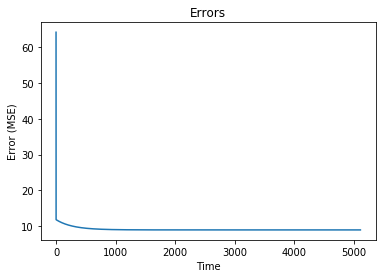

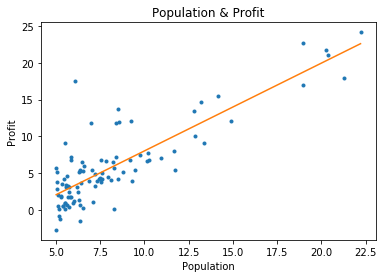

In [16]:
# Somewhat enhanced gradient descent with epsilon

b, k = init_parameters()

e = [] # recorded errors

eps = 1e-10 # declare convergence if the absolute interval between two neighbor errors is less than eps
interval = 100

i = 0
e.append((i, mse(x, linear(b, k), y)))

while True:
    if i % interval == 0:
        print('Epoch {}: b = {}, k = {}, error = {}'.format(i, b, k, e[-1][1]))
    f = linear(b, k)
    b_offset, k_offset = 0, 0
    for j in range(m):
        term = f(x[j]) - y[j]
        b_offset += term
        k_offset += term * x[j]
    b_offset = b_offset * alpha / m
    k_offset = k_offset * alpha / m
    b -= b_offset
    k -= k_offset
    e.append((i, mse(x, linear(b, k), y)))
    i += 1
    if abs(e[-1][1] - e[-2][1]) < eps:
        break;

print('Epoch {}: b = {}, k = {}, error = {}'.format(i, b, k, e[-1][1]))

plot_errors()
visualize(linear(b, k))

In [17]:
# This section is yet to be improved

pass

### Normal Equation

Normal equation is a method to analytically figure out the best answer to some regression problems, including linear regression.

Compared with gradient descent, normal equation can provide the simpe